In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [6]:
print(x_train.shape,
y_train.shape,
x_test.shape,
y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We convert 2d array to 1d array


In [8]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [9]:
y_train.shape


(50000,)

In [10]:
y_test.shape

(10000,)

In [11]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

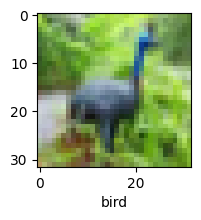

In [13]:
plot_sample(x_train, y_train, 6)

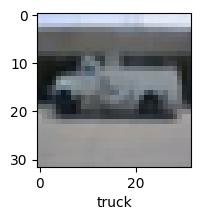

In [14]:
plot_sample(x_train, y_train, 110)

Normalizing image from 0 to 255 to 0 to 1

In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Building Artificial Neural Network for Classification


In [16]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer = "SGD",
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8069 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6220 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5384 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4785 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4302 - accuracy: 0.4959


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred  = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.61      0.48      0.53      1000
           1       0.79      0.28      0.41      1000
           2       0.33      0.41      0.36      1000
           3       0.31      0.37      0.34      1000
           4       0.58      0.13      0.21      1000
           5       0.34      0.42      0.38      1000
           6       0.43      0.69      0.53      1000
           7       0.66      0.38      0.48      1000
           8       0.51      0.73      0.60      1000
           9       0.48      0.66      0.56      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [18]:
import seaborn as sns

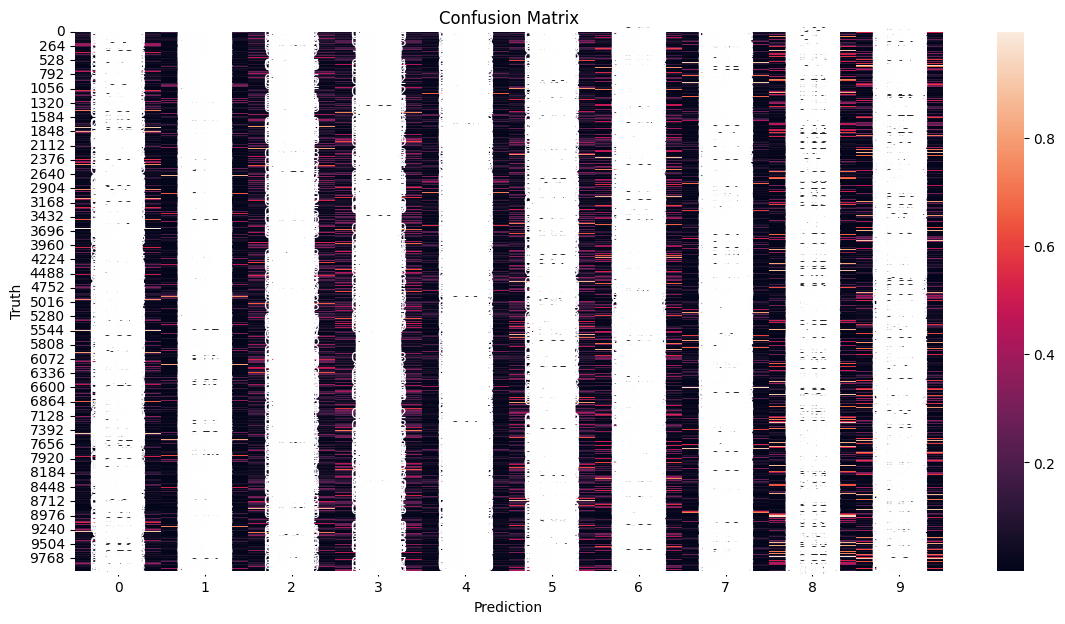

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

Building Convolutional Neural Network for Classification


In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
cnn.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 6ms/step - loss: 1.4419 - accuracy: 0.4836
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1018 - accuracy: 0.6143
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9776 - accuracy: 0.6591
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8878 - accuracy: 0.6913
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8207 - accuracy: 0.7169


In [25]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9281 - accuracy: 0.6837


[0.9281333088874817, 0.6837000250816345]

In [27]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.8121446e-03, 5.2128256e-05, 2.1217611e-02, 6.6125572e-01,
        2.7119936e-03, 9.2426039e-02, 1.1401672e-01, 4.8694457e-04,
        1.0580164e-01, 2.1913812e-04],
       [5.6582196e-03, 7.3108259e-03, 1.6936778e-05, 3.2371145e-06,
        7.2922439e-06, 2.7106222e-07, 3.6127361e-08, 1.3415744e-08,
        9.8694986e-01, 5.3331893e-05],
       [4.9954832e-02, 2.4080719e-01, 9.2153420e-04, 1.3306618e-02,
        9.5114327e-04, 1.2202117e-03, 2.1878755e-04, 9.4939867e-04,
        6.5296263e-01, 3.8707733e-02],
       [7.9425347e-01, 8.0526182e-03, 1.2260347e-01, 8.9461720e-03,
        2.6558707e-02, 2.4593904e-04, 1.6135892e-02, 2.7648080e-04,
        2.2691468e-02, 2.3580241e-04],
       [2.9766054e-06, 1.4773504e-05, 7.5246608e-03, 3.7889104e-02,
        5.8105773e-01, 2.0071710e-03, 3.7146223e-01, 1.4240774e-05,
        2.5897341e-05, 1.3022243e-06]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Now we will predict images

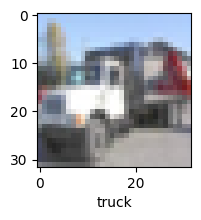

In [31]:
plot_sample(x_test,y_test,45)

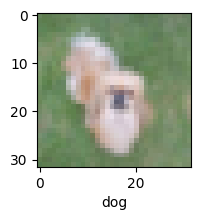

In [34]:
plot_sample(x_test,y_test,1235)

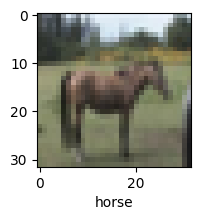

In [40]:
plot_sample(x_test,y_test,9999)

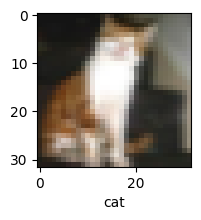

In [45]:
plot_sample(x_test,y_test,5343)

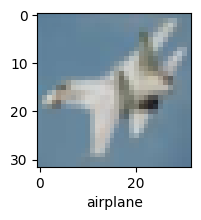

In [46]:
plot_sample(x_test,y_test,10)

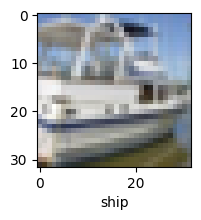

In [49]:
plot_sample(x_test,y_test,918)

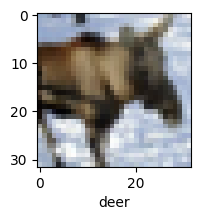

In [52]:
plot_sample(x_test,y_test,993)

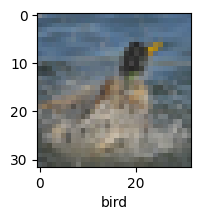

In [55]:
plot_sample(x_test,y_test,8412)

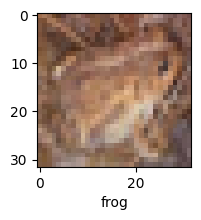

In [56]:
plot_sample(x_test,y_test,777)

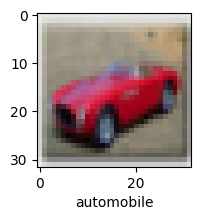

In [65]:
plot_sample(x_test,y_test,1234)

In [44]:
classes[y_classes[60]]

'horse'

In [47]:
classes[y_classes[9]]

'automobile'